<a href="https://colab.research.google.com/github/Stevox2014/pythoncode/blob/main/Web_Scraping_and_analysis_of_phones_sold_Jumia_nigeria_website_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup


In [ ]:
resps = []

for i in range(2, 50):
    url = "https://www.jumia.com.ng/catalog/?q=smart+phones&page=" + str(i)
    print(url)
    resp = requests.get(url)
    resps.append(resp.text)

# Join all the contents together
respss = '\n'.join(resps)
print(respss)

soup = BeautifulSoup(respss, 'html.parser')

https://www.jumia.com.ng/catalog/?q=smart+phones&page=2
https://www.jumia.com.ng/catalog/?q=smart+phones&page=3
https://www.jumia.com.ng/catalog/?q=smart+phones&page=4
https://www.jumia.com.ng/catalog/?q=smart+phones&page=5
https://www.jumia.com.ng/catalog/?q=smart+phones&page=6
https://www.jumia.com.ng/catalog/?q=smart+phones&page=7
https://www.jumia.com.ng/catalog/?q=smart+phones&page=8
https://www.jumia.com.ng/catalog/?q=smart+phones&page=9
https://www.jumia.com.ng/catalog/?q=smart+phones&page=10
https://www.jumia.com.ng/catalog/?q=smart+phones&page=11
https://www.jumia.com.ng/catalog/?q=smart+phones&page=12
https://www.jumia.com.ng/catalog/?q=smart+phones&page=13
https://www.jumia.com.ng/catalog/?q=smart+phones&page=14
https://www.jumia.com.ng/catalog/?q=smart+phones&page=15
https://www.jumia.com.ng/catalog/?q=smart+phones&page=16
https://www.jumia.com.ng/catalog/?q=smart+phones&page=17
https://www.jumia.com.ng/catalog/?q=smart+phones&page=18
https://www.jumia.com.ng/catalog/?q=sma

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
items = soup.find_all("article",{'class':"prd _fb col c-prd"})

In [ ]:
len(items)

1920

In [ ]:
info = []
for item in items:
    record = {}
    record['title'] = item.find('h3', {'class': "name"}).text
    record['Source'] = item.find('div', {'class': "bdg _mall _xs"}).text if item.find('div', {'class': "bdg _mall _xs"}) is not None else "Unknown source"
    record['Brand'] = item.find('a', {'class': "core"}).get('data-brand') if item.find('a', {'class': "core"}) is not None else "Unknown brand"
    record['Category'] = item.find('a', {'class': "core"}).get('data-category') if item.find('a', {'class': "core"}) is not None else "Unknown brand"
    record['Rating'] = float(item.find('div', {'class': "stars _s"}).text[:3].replace(' o', '').replace(',', '').split('-')[0]) if item.find('div', {'class': "stars _s"}) is not None else 5
    record['Discounted price'] = float(''.join(filter(str.isdigit, item.find('div', {'class': 'prc'}).text.split('-')[0])))
    record['price'] = float(''.join(filter(str.isdigit, item.find('div', {'class': 'old'}).text.split('-')[0]))) if item.find('div', {'class': 'old'}) is not None else record['Discounted price']
    info.append(record)

In [ ]:
df=pd.json_normalize(info)

In [ ]:
df.head()

,title,Source,Brand,Category,Rating,Discounted price,price
0,7''1024*600 LCD With Touchscreen Digitizer Dis...,Unknown source,Generic,Automobile/Car Electronics & Accessories/Car E...,5.0,23913.0,28160.0
1,"Tecno POP 7 6.6"" 2GB RAM/ 64GB ROM Android 12 ...",Official Store,Tecno,Phones & Tablets/Mobile Phones/Smartphones/And...,4.4,59000.0,110800.0
2,XIAOMI Redmi A2+ 6.52” 2GB RAM/32GB ROM Androi...,Official Store,XIAOMI,Phones & Tablets/Mobile Phones/Smartphones/And...,4.0,46500.0,59000.0
3,"AGM NOTE N1,6.52"" 4G Smartphone, 128+16GB*(8+8...",Official Store,AGM,Phones & Tablets/Mobile Phones/Smartphones/And...,5.0,76000.0,150000.0
4,"Samsung Galaxy A14 6.6"" 4GB RAM/64GB ROM Andro...",Official Store,Samsung,Phones & Tablets/Mobile Phones/Smartphones/And...,4.4,100300.0,119000.0


In [ ]:
df.shape

(1920, 7)

In [ ]:
df.describe()

,Rating,Discounted price,price
count,1920.000000,1.920000e+03,1.920000e+03
mean,4.940104,4.225551e+04,5.466268e+04
std,0.288635,1.001933e+05,1.329306e+05
min,1.000000,6.100000e+02,2.310000e+03
25%,5.000000,1.457400e+04,2.001725e+04
50%,5.000000,2.097900e+04,2.543550e+04
75%,5.000000,2.628400e+04,3.249100e+04
max,5.000000,1.999400e+06,2.999999e+06


In [ ]:
df.dtypes

title                object
Source               object
Brand                object
Category             object
Rating              float64
Discounted price    float64
price               float64
dtype: object

In [ ]:
df.isna().sum()

title               0
Source              0
Brand               0
Category            0
Rating              0
Discounted price    0
price               0
dtype: int64

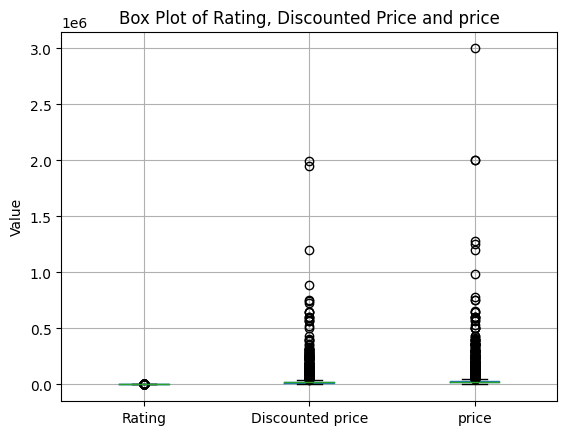

In [ ]:
import matplotlib.pyplot as plt

df.boxplot(column=['Rating', 'Discounted price', 'price'])
plt.title('Box Plot of Rating, Discounted Price and price')
plt.ylabel('Value')
plt.show()


In [ ]:
from scipy import stats

# Convert 'price' column to numeric data type
df['price'] = pd.to_numeric(df['price'], errors='coerce')

# Calculate z-scores
z_scores = stats.zscore(df['price'].dropna())

# Set threshold value
threshold = 3.0  # Adjust the threshold value as needed

# Filter out outliers based on z-scores
df = df[(np.abs(z_scores) < threshold) | (df['price'].isnull())]


In [ ]:
df.duplicated().sum()

329

In [ ]:
# Example: Print the duplicate rows for further investigation
duplicate_rows = df[df.duplicated()]
print(duplicate_rows)


                                                  title          Source  \
40    XIAOMI Redmi Note 11s 6.43" 6G+128G Dual SIM F...  Official Store   
158   For Bottom Mic USB Charger Sub Board Connector...  Unknown source   
175   5Pcs/2pcs/1pc/lot Metal Plates With Adhensive ...  Unknown source   
180   For Samsung Galaxy Tab 4 8.0 T331 T335 T330 To...  Unknown source   
199   Tested 5.2'' LCD Display For Meizu M5S LCD Mei...  Unknown source   
...                                                 ...             ...   
1909          1PCS KB5150 MP123T-CH32X KB5150 ZL-03ALED  Unknown source   
1910  Latumab 5.6inch AT056TN52 V3 LCD Screen + VGA ...  Unknown source   
1911  Cool Than Talk 7 X 7 Xs U51GT Dual Quad-core E...  Unknown source   
1918  Sim Micro SD Card Socket Holder Slot Tray Read...  Unknown source   
1919        New Touch Screen LCD Display LCD Screen For  Unknown source   

        Brand                                           Category  Rating  \
40     XIAOMI  Phones &

In [ ]:
df = df.drop_duplicates(keep='first')


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.columns

Index(['title', 'Source', 'Brand', 'Category', 'Rating', 'Discounted price',
       'price'],
      dtype='object')

<ipython-input-40-68544b7ea57a>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


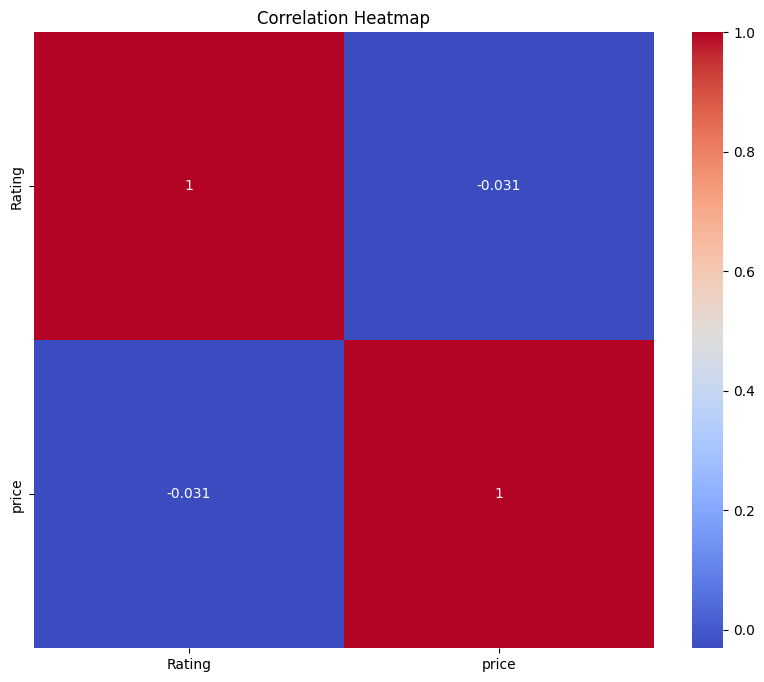

In [ ]:
import seaborn as sns
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
average_rating = df["Rating"].mean()
print("Rating:", average_rating)

Rating: 4.926930440331844


In [ ]:
df['price'] = df['price'].replace(',','').astype(float)
ave_price = df['price'].mean()
ave_price

40560.86534079138

In [ ]:
positive_reviews = df[df["Rating"] >= 4]
#print(positive_reviews)

In [ ]:
len(positive_reviews)

4741

In [ ]:
highest_discount_product = df.loc[df['Discounted'].idxmax()]
print(highest_discount_product)


title         Samsung GALAXY A53-6.5"-128GB/6GB ROM-64MP/32M...
source                                           Unknown source
Brand                                                   Samsung
category      Phones & Tablets/Mobile Phones/Smartphones/And...
Rating                                                      5.0
Discounted                                            4000000.0
price                                                  277500.0
Name: 646, dtype: object


In [ ]:
import sqlite3

# connecting to the sqlite database
conn = sqlite3.connect("reviews.db")

# creating a cursor object
cursor = conn.cursor()


In [ ]:
cursor.execute('''CREATE TABLE IF NOT EXISTS reviews
                  (title TEXT, source TEXT, Brand TEXT, category TEXT, Rating REAL, Discounted price TEXT, price TEXT)''')

In [ ]:
# Insert the data into the table
for _, row in df.iterrows():
    cursor.execute("INSERT INTO reviews VALUES (?, ?, ?, ?, ?, ?, ?)",
                   (row["title"], row["Source"], row["Brand"], row["Category"], row["Rating"], row["price"], row["Discounted price"]))


In [ ]:
# Commit the changes and close the connection
conn.commit()
conn.close()


In [ ]:
conn = sqlite3.connect("reviews.db")

In [ ]:
df = pd.read_sql_query("SELECT * FROM reviews", conn)

NameError: ignored

In [ ]:
average_rating = df["Rating"].mean()
total_reviews = len(df)
positive_reviews = df[df["Rating"] >= 4]


In [ ]:
# Sort the DataFrame by "Discounted price" in descending order
df_sorted = df.sort_values(by="Discounted", ascending=False)

# Get the top N products with the highest discount
top_products = df_sorted.head(5)  # Change the number to the desired count of top products
print("Top Products with Highest Discount:")
print(top_products)

In [ ]:
# Print the results
print("Average Rating:", average_rating)
print("Average Price:", ave_price)
print("Total Reviews:", total_reviews)
print("Positive Reviews:")
print(positive_reviews)
print("Highest_Discount_Product:", highest_discount_product)


Average Rating: 4.936958773565362
Average Price: 40560.86534079138
Total Reviews: 4827
Positive Reviews:
                                                  title          source  \
0     AGM NOTE N1,6.52" 4G Smartphone, 128+16GB*(8+8...  Official Store   
1     XIAOMI Redmi A2+ 6.52” 2GB RAM/32GB ROM Androi...  Official Store   
2     Black For Sony Xperia Tablet Z2 SGP511 G512 SG...  Unknown source   
3     Samsung Galaxy A14 6.6" 4GB RAM/64GB ROM Andro...  Official Store   
4     XIAOMI A1 Plus 6.52" 2GB RAM/32GB ROM Android ...  Official Store   
...                                                 ...             ...   
4822  New Touch Screen Panel Digitizer Glass For Tab...  Unknown source   
4823  Bicycle Stopwatch LCD Screen With Touch Screen...  Unknown source   
4824  360° Car Rearview Mirror Phone Holder Mount Ph...  Unknown source   
4825  Wholesale 7'' Inch For Huawei Mediapad S7 Lite...  Unknown source   
4826  3 In1 USB HUB Type-C To HDMI-Compatible 3 Port...  Unknown sourc

In [ ]:
# Close the connection
conn.close()